## Random Imputer

1. Preserves the variance of the variable (But Why?)
2. Memory heavy for deployment,as we need to store the orginal training set to extract value from and replace the NA in coming observations
3. Well suited for liner models as it does the distribution,regardless of the % NA

In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('train.csv',usecols=['age','survived','fare'])

In [30]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
df.isnull().mean()*100

survived     0.00000
age         19.86532
fare         0.00000
dtype: float64

In [32]:
X = df.drop(columns=['survived'])
y = df['survived']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
X_train['Age_imputed'] = X_train['age']
X_test['Age_imputed'] = X_test['age']

In [35]:
X_train

,age,fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [36]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['age'].dropna().sample(X_test['age'].isnull().sum()).values

In [37]:
# X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values

In [38]:
# X_train['age'].isnull().sum()

In [39]:
X_train

,age,fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,33.0
493,71.0,49.5042,71.0
527,NaN,221.7792,20.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_12788\311133798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'],label='orignal',hist=False)


KeyError: 'age_imputed'

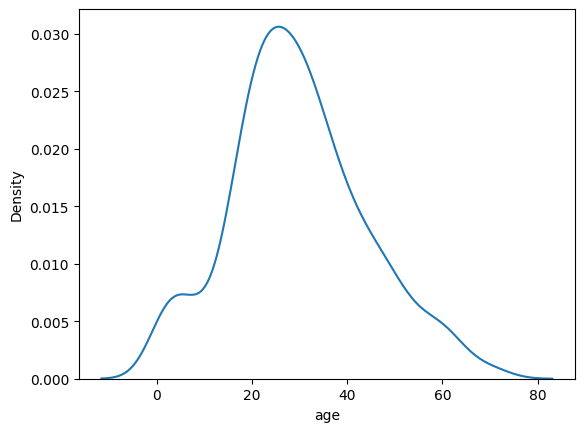

In [41]:
sns.distplot(X_train['age'],label='orignal',hist=False)
sns.distplot(X_train['age_imputed'],label='imputed',hist=False)

plt.legend()
plt.show()

In [ ]:
print('original variable variance:',X_train['Age'].var())
print('varience after random imputed:',X_train['Age_imputed'].var())

In [ ]:
X_train[['Fare','Age','Age_imputed']].cov()

In [ ]:
X_train[['Age','Age_imputed']].boxplot()

In [ ]:
X_train['Fare'] = X_train['Fare'].astype(int)

In [ ]:
observation = X_train['Fare']
print(observation)
sampled_value = X_train['Age'].dropna().sample(1, random_state=(observation))


In [ ]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
data.head()

In [ ]:
data.isnull().mean()*100

In [ ]:
X = data
y = data['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [ ]:
X_train

In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [ ]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],axis=1
)

temp.columns =  ['original','imputed']


In [ ]:
temp

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

In [ ]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

## Missing-Indicator

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer,MissingIndicator

In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Survived','Fare'])

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

In [ ]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)
len(X_train_trf)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
mi = MissingIndicator()

mi.fit(X_train)

In [ ]:
mi.features_

In [ ]:
X_train_missing = mi.transform(X_train)

In [ ]:
X_train_missing

In [ ]:
X_test_missing = mi.transform(X_test)


In [ ]:
X_train['Age_NA'] = X_train_missing

In [ ]:
X_test['Age_NA'] = X_test_missing

In [ ]:
X_train

In [ ]:
X_test_missing

In [ ]:
si = SimpleImputer()

X_train_trf2= si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clg = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)


from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

## shortcut

In [ ]:
si = SimpleImputer(add_indicator=True)

In [ ]:
X_train = si.fit_transform(X_train)

In [ ]:
X_test = si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


## Automaticaly select value for imputation

In [ ]:
import numpy as np
import pandas as  pd

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,y_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

In [ ]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
clf

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

In [ ]:
print(f"internal CV score : {grid_search.best_score_:.3f}")

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values('mean_test_score',ascending=False) 
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]
# cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]
